# Business Questions

## Assignment: two main questions
    1. Has there been adequate staff and capacity in the network?
    2. What was the actual utilization of resources?

Desired outcome is to determine if additional resources are required based on current use.


## Assumptions:

- Each appointment is done by unique patient, no recurring patiences
- Maximum capacity is average of appointments over 30 months
- Unknown records represent benchmark for centralization of patient information via the Health Care Network
- Outliers regarding appointments can reflect threatment and represent variability of diseases patients can have (not elimination of outliers has it representative)

## Risks:

- By assuming each appointment is a unique patient, the total number of patients within the area is multiplied 
- Alternative to more accurate patients information, is that if health data were to made public and would have irreversable damages to people quality of life - highly sensitive information even properly steps to masks identity of patients can result 

## Challenges & Solutions:

 1. Challenge: time element not all data sets have the duration of time recorder
    - Solution: Choose to focus on largest duration to identify long-term trends of macro factors.
    > **IMPORTANT**: 
    > - AR used for macro trend (30 months recorded appointment data) tells us if appointments are increasing and benchmark to evaluate if staff and capacity are adequate
    >
    > - NC used to determined current utilization and create profile on common patient; what the most used service and most visited consulation location



# 0. Plan: Getting to know your data
------
## Approach: 
- Time important section: provide rate of patients per month & important differences in dataset
Consideration and selection of data sets 
- Take away: 
    - AR used for macro trend (30 months recorded appointment data) tells us if appointments are increasing and benchmark to evaluate if staff and capacity are adequate
        - used metric, weighted AR average, seen in linegraph as reference line

    - NC used to determined current utilization and create profile on common patient; what the most used service and most visited consulation location
------
## Execution flow:
1. Setup
2. Data Cleaning workflow
3. Analysis
   
    1. Current Utilization benchmark to understand if additional resources are needed or not (metric to measure adequacy)
    2. Mapping network provides context to determine adequacy
    4. Determine adequacy of staff and using patients appointments to analysis trends over time
        1. Average monthly appointments
        2. Total number of patients
        3. Criteria of evaluation if adequate or not:
            1. Number of months above average compared to below average - if total above average is greater than total below average we can concluse **NOT ADEQUATE** else **ADEQUATE**
            2. Apply above approach for patients appointments over months and staff 
-------

## Questions - cell 51 review

 1. To understand if the staff levels need to increase check count of appointments 
    - cell 16
 2. Should the NHS start looking at increasing staff levels? [nc] 
    - what is current trend now of patient? is it increasing or decreasing? What is the average?
    - cell 45
3. What is the max capacity? How to define capacity? [nc]
    - Number of appointments calendar scope limited to only day and month
    - cell 48
4. How many icb are within each region?
    - cell 66
5. What is the total number of patients per region? 
    - cell 68
6. How many sub_icb are within each region?
    - cell 70
7. How many patients are in each region?
    - Total per region
    - cell 72
--------

## Lesson learned

- nc_c['appointment_month'].dt.month  # issue .dt.month works only with datetime type - cell 18
-  Months - approach use appointment month to derive the rest of scale
ar_total_months2 = ar["appointment_month"].nunique()

In [1]:
# Formatter

# Import
import jupyter_black

# Execute
jupyter_black.load() 

## 1. Setup

In [2]:
# Import modules/libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Absolute path per data source
ad_path = "actual_duration.csv"
ar_path = "appointments_regional.csv"
nc_path = "national_categories.xlsx"

In [4]:
# Importation of data source csv files
ad = pd.read_csv(ad_path)
ar = pd.read_csv(ar_path)
# Importation of data source xlsx file
nc = pd.read_excel(nc_path)

## 2. Data Cleaning workflow five steps:
1. Data exploration
2. Data cleaning
3. Missing data 
    - Options:
        a. removal of data
        b. imputation of data (most common)
4. Duplicates
5. Outliers

> Purpose is to strengthen Data Quality:
>1. Accuracy
>2. Relevance
>3. Consistency
>4. Completeness
>5. Uniformity

### 2.1. Data exploration

In [6]:
# Verification
print(ad.info())
print(ar.info())
print(nc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       

- Comment: would be nice to have it in plain view
- Insight: noticed different observations amount per data set
- Assumption: NHS network includes GP in small villages like specialized hospital in big city. Accounting for the difference

### 2.2. Data cleaning via conversion of dtypes
> Get to know your data: Time

#### Nc: conversion dtypes, calendar totals per data set, table summary

In [7]:
# 1. To understand if the staff levels need to increase check count of appointments

# Backup nc
nc_c = nc.copy()

# Check data types within data sets
display(nc_c.dtypes)
display(ar.dtypes)
display(ad.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

In [8]:
# Clean nc - .convert_dtypes() works with df
nc_c = nc_c[
    [
        "icb_ons_code",
        "sub_icb_location_name",
        "service_setting",
        "context_type",
        "national_category",
        "appointment_month",
    ]
].convert_dtypes(
    convert_string=True,
)

# Check dtypes change
display(nc_c.dtypes)

# Add missing date column
display(nc_c.head())
nc_c["appointment_date"] = nc["appointment_date"]
nc_c["count_of_appointments"] = nc["count_of_appointments"]

# Check integration
display(nc_c.dtypes)


icb_ons_code             string[python]
sub_icb_location_name    string[python]
service_setting          string[python]
context_type             string[python]
national_category        string[python]
appointment_month        string[python]
dtype: object

,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,appointment_month
0,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,2021-08
1,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,2021-08
2,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,2021-08
3,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,2021-08
4,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2021-08


icb_ons_code             string[python]
sub_icb_location_name    string[python]
service_setting          string[python]
context_type             string[python]
national_category        string[python]
appointment_month        string[python]
appointment_date         datetime64[ns]
count_of_appointments             int64
dtype: object

,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,appointment_month,appointment_date,count_of_appointments
0,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,2021-08,2021-08-02,3
1,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,2021-08,2021-08-02,7
2,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,2021-08,2021-08-02,79
3,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,2021-08,2021-08-02,725
4,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2021-08,2021-08-02,2


In [10]:
# Total number of months and days


# Approach: nunique
display(nc_c["appointment_month"].unique())
# Total number of month
nc_total_months = nc_c["appointment_month"].nunique()
# Total number of days
nc_total_days = nc_c["appointment_date"].nunique()
# Total number of weeks
nc_total_weeks = round(nc_total_days / 7)
# Total number of weekends
nc_c.loc[
    (nc_c["appointment_date"].dt.day_of_week == 5)
    | (nc_c["appointment_date"].dt.day_of_week == 6),
    "appointment_date",
].unique()
nc_total_weekends = nc_c.loc[
    (nc_c["appointment_date"].dt.day_of_week == 5)
    | (nc_c["appointment_date"].dt.day_of_week == 6),
    "appointment_date",
].nunique()

# Total number of weekdays
nc_c.loc[
    (nc_c["appointment_date"].dt.day_of_week != 5)
    & (nc_c["appointment_date"].dt.day_of_week != 6),
    "appointment_date",
].unique()
nc_total_weekdays = nc_c.loc[
    (nc_c["appointment_date"].dt.day_of_week != 5)
    & (nc_c["appointment_date"].dt.day_of_week != 6),
    "appointment_date",
].nunique()

# Summary table: nc
nc_time_totals_dict = {
    "Total months": nc_total_months,
    "Total days": nc_total_days,
    "Total weeks": nc_total_weeks,
    "Total weekdays": nc_total_weekdays,
    "Total weekends": nc_total_weekends,
}

nc_time_table = pd.DataFrame(nc_time_totals_dict, index=["nc"])
display(nc_time_table)

<StringArray>
['2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02',
 '2022-03', '2022-04', '2022-05', '2022-06']
Length: 11, dtype: string

,Total months,Total days,Total weeks,Total weekdays,Total weekends
nc,11,334,48,239,95


#### Ar: conversion dtypes, calendar totals per data set, table summary

In [11]:
# AR time series conversion

# Make copy
ar_c = ar.copy()
# Check dtypes
ar_c.dtypes
# Convert columns to correct dtype
ar_c = ar_c[
    [
        "icb_ons_code",
        "appointment_month",
        "appointment_status",
        "hcp_type",
        "appointment_mode",
        "time_between_book_and_appointment",
    ]
].convert_dtypes(convert_string=True)

# Add missing column from original
ar_c["count_of_appointments"] = ar["count_of_appointments"]
ar_c["appointment_month_datetime"] = pd.to_datetime(
    ar_c["appointment_month"], format="%Y-%m", exact=True
)
# Check
display(ar_c.dtypes)

# Verify original still valid
display(ar.shape)
display(ar_c.shape)

ar_c.head()

icb_ons_code                         string[python]
appointment_month                    string[python]
appointment_status                   string[python]
hcp_type                             string[python]
appointment_mode                     string[python]
time_between_book_and_appointment    string[python]
count_of_appointments                         int64
appointment_month_datetime           datetime64[ns]
dtype: object

(596821, 7)

(596821, 8)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,appointment_month_datetime
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107,2020-01-01
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,2020-01-01
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,2020-01-01
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,2020-01-01
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,2020-01-01


In [12]:
# Experimenting
# Period of ar
display(ar_c["appointment_month"].min())
display(ar_c["appointment_month"].max())

# Number of months
display(ar_c["appointment_month"].nunique())

# Number of days
# Create datetime month
ar_c["appointment_month_datetime"] = pd.to_datetime(
    ar_c["appointment_month"], format="%Y-%m", exact=True
)

# Check
display(ar_c.dtypes)

# Number of days
# display(ar_c.groupby(['appointment_month_datetime'].dt.day)['appointment_month_datetime'].count())
display(ar_c["appointment_month_datetime"].dt.day)
display(30 / 12)  # number of year
display(
    ar_c["appointment_month_datetime"].dt.days_in_month.unique()
)  # days within period
display((30 / 12) * 7)  # manually calculate number of months with 31
display((30 / 12) * 5)  # manually calculate number of months with 30 (exclude feb)
# check range of data set ar
display(ar_c["appointment_month_datetime"].max())
display(ar_c["appointment_month_datetime"].min())

# manual cal
display((24 * 7) + 3)  # 31
display((24 * 5) + 3)  # 30
display(((2 * 3) - 1))  # 28 correction for feb and leap year

# actual calculate assuming finished 1st of June 2022 (else +30)
(171 + 123) - 5  # actual number of days depending on metadata

# ar_total_days = ((7+7+3) * 31) + ((5+5+3) * 30) - (2+2+1) # includes leap year and june 30 days
ar_check_days = ((7 + 7 + 3) * 31) + (
    (5 + 5 + 2) * 30
)  # excludes leap year and june 30 days
ar_check_days = ar_check_days - (
    2 + 2 + 1
)  # includes leap year and excludes june 30 days /june 1st

'2020-01'

'2022-06'

30

icb_ons_code                         string[python]
appointment_month                    string[python]
appointment_status                   string[python]
hcp_type                             string[python]
appointment_mode                     string[python]
time_between_book_and_appointment    string[python]
count_of_appointments                         int64
appointment_month_datetime           datetime64[ns]
dtype: object

0         1
1         1
2         1
3         1
4         1
         ..
596816    1
596817    1
596818    1
596819    1
596820    1
Name: appointment_month_datetime, Length: 596821, dtype: int32

2.5

array([31, 29, 30, 28], dtype=int32)

17.5

12.5

Timestamp('2022-06-01 00:00:00')

Timestamp('2020-01-01 00:00:00')

171

123

5

In [13]:
# Total number of months and days

# Approach: nunique
display(ar_c["appointment_month"].unique())
# Total number of month
ar_total_months = ar_c["appointment_month"].nunique()
display(ar_total_months)
# Total number of days
ar_total_days = ar_check_days
display(ar_c["appointment_month_datetime"].unique())
# Total number of weeks
ar_total_weeks = round(ar_total_days / 7)
# Total number of weekends
ar_c.loc[
    (ar_c["appointment_month_datetime"].dt.day_of_week == 5)
    | (ar_c["appointment_month_datetime"].dt.day_of_week == 6),
    "appointment_month_datetime",
].unique()
ar_total_weekends = ar_c.loc[
    (ar_c["appointment_month_datetime"].dt.day_of_week == 5)
    | (ar_c["appointment_month_datetime"].dt.day_of_week == 6),
    "appointment_month_datetime",
].nunique()

# Total number of weekdays
ar_c.loc[
    (ar_c["appointment_month_datetime"].dt.day_of_week != 5)
    & (ar_c["appointment_month_datetime"].dt.day_of_week != 6),
    "appointment_month_datetime",
].unique()
ar_total_weekdays = ar_c.loc[
    (ar_c["appointment_month_datetime"].dt.day_of_week != 5)
    & (ar_c["appointment_month_datetime"].dt.day_of_week != 6),
    "appointment_month_datetime",
].nunique()

# Summary table: nc
ar_time_totals_dict = {
    "Total months": ar_total_months,
    "Total days": ar_total_days,
    "Total weeks": ar_total_weeks,
    "Total weekdays": ar_total_weekdays,
    "Total weekends": ar_total_weekends,
}
# Create table
ar_time_table = pd.DataFrame(ar_time_totals_dict, index=["ar"])
display(ar_time_table)

<StringArray>
['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
 '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
 '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
 '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04',
 '2022-05', '2022-06']
Length: 30, dtype: string

30

<DatetimeArray>
['2020-01-01 00:00:00', '2020-02-01 00:00:00', '2020-03-01 00:00:00',
 '2020-04-01 00:00:00', '2020-05-01 00:00:00', '2020-06-01 00:00:00',
 '2020-07-01 00:00:00', '2020-08-01 00:00:00', '2020-09-01 00:00:00',
 '2020-10-01 00:00:00', '2020-11-01 00:00:00', '2020-12-01 00:00:00',
 '2021-01-01 00:00:00', '2021-02-01 00:00:00', '2021-03-01 00:00:00',
 '2021-04-01 00:00:00', '2021-05-01 00:00:00', '2021-06-01 00:00:00',
 '2021-07-01 00:00:00', '2021-08-01 00:00:00', '2021-09-01 00:00:00',
 '2021-10-01 00:00:00', '2021-11-01 00:00:00', '2021-12-01 00:00:00',
 '2022-01-01 00:00:00', '2022-02-01 00:00:00', '2022-03-01 00:00:00',
 '2022-04-01 00:00:00', '2022-05-01 00:00:00', '2022-06-01 00:00:00']
Length: 30, dtype: datetime64[ns]

,Total months,Total days,Total weeks,Total weekdays,Total weekends
ar,30,882,126,22,8


Insights:

      - the datetime conversion will automatically put 01 at the end of every month: weekend, weekday, days become useless since the data does not represent moment of appointment
      - it means that counts only value with and cannot be used as a generator of sequencial values like method range
      - would have never noticed without manual verification and proceed with user-define functions (assumptions)
      - table reflect actual data found in dataset
      - with time series always perculiar because of changes: leap year its 366 days, thanksgiving 3rd thursday of the month not specific day
      - time series analysis: months consistent within year beware of days is it inclusive or exclusive like indexing in python in a list or subsetting in pandas

In [12]:
# Experimentation:

# Number 
print(ar_c['appointment_month'].min())
print(ar_c['appointment_month'].max())
print(ar_c['appointment_month_datetime'] == '2022-06-01')
print(ar_c['appointment_month_datetime'].dt.days_in_month.drop_duplicates()) # remove duplicate
# print(ar_c['appointment_month'].mask())

print(52/12)
print(4.33 * 30)  # alternative method to calculating the weeks
print(365 * 2.5)  # alternative method to calculating the days 

# Insight:
# - .dt + .days/.month/. + datetime conversion time tells you the number of data points within the data set
# - error commited using it to create total table - actuallity its the count of different range 

2020-01
2022-06
0         False
1         False
2         False
3         False
4         False
          ...  
596816     True
596817     True
596818     True
596819     True
596820     True
Name: appointment_month_datetime, Length: 596821, dtype: bool
0       31
189     29
581     30
2508    28
Name: appointment_month_datetime, dtype: int32
4.333333333333333
129.9
912.5


#### Ad: conversion dtypes, calendar totals, table summary 

In [14]:
# Time series conversion
# Copy
ad_c = ad.copy()

# Dtype + shape
display(ad_c.shape)
display(ad_c.dtypes)

# Convert object to str
ad_c = ad_c[
    [
        "sub_icb_location_code",
        "sub_icb_location_ons_code",
        "sub_icb_location_name",
        "icb_ons_code",
        "region_ons_code",
        "actual_duration",
    ]
].convert_dtypes(convert_string=True)
# Restore numeric
ad_c["count_of_appointments"] = ad["count_of_appointments"]
ad_c["appointment_date"] = pd.to_datetime(ad["appointment_date"], format="mixed")

# Check everything done as expected
display(ad_c.shape)
display(ad_c.dtypes)
display(ad_c.head())

(137793, 8)

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

(137793, 8)

sub_icb_location_code        string[python]
sub_icb_location_ons_code    string[python]
sub_icb_location_name        string[python]
icb_ons_code                 string[python]
region_ons_code              string[python]
actual_duration              string[python]
count_of_appointments                 int64
appointment_date             datetime64[ns]
dtype: object

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,actual_duration,count_of_appointments,appointment_date
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,31-60 Minutes,364,2021-12-01
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,21-30 Minutes,619,2021-12-01
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,6-10 Minutes,1698,2021-12-01
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,Unknown / Data Quality,1277,2021-12-01
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,16-20 Minutes,730,2021-12-01


In [15]:
# Total number of months and days, weeks, weekdays, and weekend

# Range of time frame
display(ad_c["appointment_date"].min())
display(ad_c["appointment_date"].max())
# Insight: 7 months timeframe - [should include in date for each date set smart idea]


# Approach: nunique
display(ad_c["appointment_date"].nunique())  # 212 unique dates available in the dataset
display(ad_c["appointment_date"].unique())  # 212 unique dates available in the dataset

Timestamp('2021-12-01 00:00:00')

Timestamp('2022-06-30 00:00:00')

212

<DatetimeArray>
['2021-12-01 00:00:00', '2021-12-02 00:00:00', '2021-12-03 00:00:00',
 '2021-12-04 00:00:00', '2021-12-06 00:00:00', '2021-12-07 00:00:00',
 '2021-12-08 00:00:00', '2021-12-09 00:00:00', '2021-12-10 00:00:00',
 '2021-12-11 00:00:00',
 ...
 '2022-02-06 00:00:00', '2022-02-13 00:00:00', '2022-02-20 00:00:00',
 '2022-03-06 00:00:00', '2022-04-24 00:00:00', '2021-12-26 00:00:00',
 '2022-04-03 00:00:00', '2022-04-17 00:00:00', '2022-05-01 00:00:00',
 '2022-05-15 00:00:00']
Length: 212, dtype: datetime64[ns]

In [16]:
# Manually calculate total days based on period and then compare with the unique data set above

# Total number of month
display(
    ad_c["appointment_date"].dt.month.nunique()
)  # total number of month - include last month since its specified 30th june
display(
    ad_c["appointment_date"].dt.month.unique()
)  # allows user to know exactly which month to determine exact days per month
display(
    ad_c["appointment_date"].dt.days_in_month.unique()
)  # feb 28th day - helps determine exact total days versus occurances in data
# Create variable
ad_total_months = ad_c["appointment_date"].dt.month.nunique()  # solved and stored


# Total number of days
ad_total_days = ad_c["appointment_date"].nunique()
ad_check_days = (
    (31 * 4) + (30 * 2) + (28 * 1)
)  # four months have 31 days, two months have 30 days, and one month has 28 days
# Verified calculation was done correctly
display(ad_total_days == ad_check_days)

7

array([12,  1,  2,  3,  4,  5,  6], dtype=int32)

array([31, 28, 30], dtype=int32)

True

In [17]:
# Total number of weeks
ad_total_weeks = round(ad_total_days / 7)


# Total number of weekends
ad_c.loc[
    (ad_c["appointment_date"].dt.day_of_week == 5)
    | (ad_c["appointment_date"].dt.day_of_week == 6),
    "appointment_date",
].unique()
# Create variable
ad_total_weekends = ad_c.loc[
    (ad_c["appointment_date"].dt.day_of_week == 5)
    | (ad_c["appointment_date"].dt.day_of_week == 6),
    "appointment_date",
].nunique()

# Total number of weekdays
ad_c.loc[
    (nc_c["appointment_date"].dt.day_of_week != 5)
    & (ad_c["appointment_date"].dt.day_of_week != 6),
    "appointment_date",
].unique()
ad_total_weekdays = ad_c.loc[
    (ad_c["appointment_date"].dt.day_of_week != 5)
    & (ad_c["appointment_date"].dt.day_of_week != 6),
    "appointment_date",
].nunique()

# Summary table: ad
ad_time_totals_dict = {
    "Total months": ad_total_months,
    "Total days": ad_total_days,
    "Total weeks": ad_total_weeks,
    "Total weekdays": ad_total_weekdays,
    "Total weekends": ad_total_weekends,
}
# Create table
ad_time_table = pd.DataFrame(ad_time_totals_dict, index=["ad"])
# See table
ad_time_table

,Total months,Total days,Total weeks,Total weekdays,Total weekends
ad,7,212,30,152,60


#### Fixed ar_time_table - constant variable based on original ar data set
- Lesson learned

In [25]:
# Fixing error - from previous  ar_time_table
# Total time variable based on period of collection in this case 2 years and 6 month assuming 30 days


# Months - approach use appointment month to derive the rest of scale
ar_total_months2 = ar["appointment_month"].nunique()
# Check
print(
    f"Total number of months in ar: {ar_total_months2}"
)  # 30 returns meaning it assumes that 2022-06 has 30 days included in the calculation

# Years
ar_total_years = ar_total_months2 / 12
# Check years
print(f"Total number of years in ar: {ar_total_years}")

# Weeks
ar_total_weeks2 = round((52 / 12) * (ar_total_years))  # rounded up from 10.83
# Check
print(f"Total number of weeks in ar: {ar_total_weeks2}")


# Days - 365 days in years more reliable than months
ar_total_days2 = round(ar_total_years * 365)
# Check
print(f"Total number of days in ar: {ar_total_days2}")

Total number of months in ar: 30
Total number of years in ar: 2.5
Total number of weeks in ar: 11
Total number of days in ar: 912


In [19]:
# Create dict
ar_time_totals_dict2 = {
    "Total months": ar_total_months,
    "Total days": ar_total_days,
    "Total weeks": ar_total_weeks,
}

# Create tabular summary for time
ar_time_table2 = pd.DataFrame(ar_time_totals_dict2, index=["ar"])

# Check tabular summary
print(f"Represents total time based on original timeframe")
display(ar_time_table2)

Represents total time based on original timeframe


,Total months,Total days,Total weeks
ar,30,882,126


In [19]:
# Lesson learned
print(ar_c.columns)  # does not have days or weeks for specific count

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments', 'appointment_month_datetime'],
      dtype='object')


### 2.3. Missing Data

In [26]:
# Summary table:
data_sources_dict = {
    "data_sources": ["nc", "ar", "ad"],
    "number of columns": [nc.shape[1], ar.shape[1], ad.shape[1]],
    "number of observations": [nc.shape[0], ar.shape[0], ad.shape[0]],
    "number of NAN": [x * 0 for x in range(3)],
    "number of categorical variables": [
        nc.shape[1] - 3,
        ar.shape[1] - 1,
        ad.shape[1] - 1,
    ],
    "number of numerical variables": [1, 1, 1],
}

# Creation of df
data_sources_table = pd.DataFrame(data_sources_dict)

# Verification
display(data_sources_table)

,data_sources,number of columns,number of observations,number of NAN,number of categorical variables,number of numerical variables
0,nc,8,817394,0,5,1
1,ar,7,596821,0,6,1
2,ad,8,137793,0,7,1


Insights: 
- Changes in number of observations, (within nc, ar, and ad) is possibly indicative of variety with Health Service network and the variety of specialized services provided.

Commentairy: 
- Interest to see what is the most common service_setting and national_category

Assumptions: 
1. Unknown are not always represented as error, it a mixed of not received or unavailability of categorical label. As such, unknown will be treated as category itself.
2. Count_of_appointments represents 1 booked appointment by 1 patients

Findings:
- Metadata indicates recorded data as being inconsistent due to:
    1. Software systems incompatibility
    2. Different method of recording information, example some count from booked appointment others from attendances of appointment
    3. Different periods of recording per data sets; nc,ar,ad
    4. Integraty of data available not reliable 
- NHS background organizational structure:
    1. ICB means integrated care board, roles is budget and delivery of supplies within there area
    2. NHS expansion plan already existed, 10 year plan, was built upon a previous plan introduced in 2019
    3. Current plan deals with reshaping network structure and roles; namely Clinical Commissioning Group (CCGs) being replaced by ICBs
    4. Structure of NHS Network: ICS = geographical area of services, ICBs = budgeting and distribution of materials needed by Sub Locations, ICP = strategic planning and role/responsibility assignment tailored per local area.
    5. Within 1 ICS = 1 ICBs & 1 ICP (Integrated partnership involves a board + members of NHS trustees). Total ICBs = 42

### 2.4. Data duplication

In [27]:
# Duplicates
print(f"Number of duplicates for nc: {nc.duplicated().sum()}")
print(f"Number of duplicates for ar: {ar.duplicated().sum()}")
print(f"Number of duplicates for ad: {ad.duplicated().sum()}")

# Ar has duplicates
print(f"AR total observations: {ar.shape[0]}")

# Why duplicates so many
ar.head()
ar.value_counts("appointment_status")
print(ar.duplicated().value_counts())  # check if it was observation
display(ar[ar.duplicated() == True].sort_index())
ar["appointment_month"].duplicated().value_counts()
ar["icb_ons_code"].duplicated().value_counts()
ar.reset_index().duplicated().value_counts()  # index unique

Number of duplicates for nc: 0
Number of duplicates for ar: 21604
Number of duplicates for ad: 0
AR total observations: 596821
False    575217
True      21604
Name: count, dtype: int64


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
19292,E54000044,2020-01,Attended,GP,Home Visit,Unknown / Data Quality,1
19308,E54000044,2020-01,Attended,GP,Unknown,Unknown / Data Quality,2
19374,E54000044,2020-01,DNA,GP,Home Visit,8 to 14 Days,1
19417,E54000044,2020-01,DNA,Unknown,Face-to-Face,2 to 7 Days,1
19419,E54000044,2020-01,DNA,Unknown,Face-to-Face,Same Day,6
...,...,...,...,...,...,...,...
596809,E54000050,2022-06,Unknown,Unknown,Telephone,15 to 21 Days,1
596812,E54000050,2022-06,Unknown,Unknown,Telephone,More than 28 Days,1
596814,E54000050,2022-06,Unknown,Unknown,Unknown,1 Day,2
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8


False    596821
Name: count, dtype: int64

Insights:
1) AR only data set but after further look each index is unique 
Assumptions:
1) Duplicated can be a representation of the same patient booking appointments

## 3. Analysis Structure:

- 3.1. Current Utilization
   1. What is current trend now of patient? is it increasing or decreasing? What is the average?
   2. Create a metric to be able to answer adequacy
   3. Visualization
      - most service used (bargraph)
      - most popular location for patients to receive service (bargraph)
      - overview of patient usage per service (pivot table)
 
- 3.2. Map out health network Network
    1. Landscape of health care network
       - Overview of total number of regions, icb, and sub-icbs
       - Distribution of icbs and sub-icbs per region
       - Distribution of patients per region
       - Identity busiest region
       - Check if correlation exists between number of patients and number of sub-icbs

- 3.3. Determine adequacy for capacity using average patient appointments and view adequacy of workload for staff

> **Logic of determining adequacy**:
>    1. Use average of patient appointments in AR data set as metric
>    2. Use total patient appointments on monthly scale to determine if trend is positive or negative
>    3. Use staff perspective to confirm or deny time series monthly patient appointments findings and gain perspective from staff perspective

### 3.1 Current Utilization
Sum of appointments per data - represents patients usage

------------------------
Overview:
1) Total patients appointment - all data sources
2) NC Total - Should the NHS start looking at increasing staff levels? [nc]
    - insights: 
        (a) nc is not accurate indicator, cannot be determined due to brevity - gives the impression its flatline (area of consolidation)
        (b) ar is more accurate since records include larger period of time:  2 years 6 months
3) Challenge of data set:
    - Insights:
        - nc advantages and disadvantages:
            - limited in records due to brief last 6 months (disadvantage)
            - provides information of current services used, and where is the bulk of the service rendered (where do most patients get consulation?)

    

In [32]:
# Total patients appointment - all data sources
print(f"NC total appointments {nc_c['count_of_appointments'].sum():,}")
print(f"AR total appointments {ar_c['count_of_appointments'].sum():,}")
print(f"NC total appointments {ad_c['count_of_appointments'].sum():,}")

NC total appointments 296,046,770
AR total appointments 742,804,525
NC total appointments 167,980,692


Comment: 
- Can add this information in table summary for data

#### 3.1.1 NC total - used to determine current usage of resources

1. Should the NHS start looking at increasing staff levels? [nc]
    - what is current trend now of patient? is it increasing or decreasing? What is the average?
    - Average over period for data set nc

In [36]:
# Average over period - nc

# Step1: total patients appointment
# Total number of patients:
print(f"Total number of patients: {nc_c["count_of_appointments"].sum():,}")
# nc - Total patients
nc_total_patients = nc_c["count_of_appointments"].sum()

# Step2: Average for entire data set - represent number of patient appointments within nc timeframe 11 months
# from 2021-08-01 to 2022-06-30
# Average - nc
print(f"Average number of patients: {nc_c["count_of_appointments"].mean():.0f}")
# nc - Average patients
nc_avg_patients = nc_c["count_of_appointments"].mean()
print(
    f"NC average patient appointment: {nc_avg_patients:,.0f}"
)  # represent average patient appointment in entire dataset

# Total number of month
display(nc_time_table)

Total number of patients: 296,046,770
Average number of patients: 362
NC average patient appointment: 362


,Total months,Total days,Total weeks,Total weekdays,Total weekends
nc,11,334,48,239,95


Insights:
- Reminder that key assumption made is that 1 appointment equals 1 patients

#### 3.1.2 Current workload (create a metric)- max capacity using rate per day, month
1. What is the max capacity? How to define capacity?
    - Number of appointments calendar scope: day and month

In [39]:
# Number of appointments calendar scope: day and month
# Current utilization / rate or average max capacity
print(
    f"Total number of patients and value within nc_total_patients: {nc_total_patients:,.0f}"
)

# Rate per day
nc_rate_per_day = round(nc_total_patients / nc_total_days)
print(f"NC rate per day: {nc_rate_per_day:,.0f}")

# Rate per month
nc_rate_per_month = round(nc_total_patients / nc_total_months)
print(f"NC rate per month: {nc_rate_per_month:,.0f}")

# Rate per weeks-> less accurate more risk
nc_rate_per_week = round(nc_total_patients / nc_total_weeks)
print(f"NC rate per week: {nc_rate_per_week:,.0f}")

# Rate per workweek
nc_rate_per_workweek = round(nc_total_patients / nc_total_weekdays)
print(f"NC rate per working week: {nc_rate_per_workweek:,.0f}")

# Rate per weekend
nc_rate_per_weekend = round(nc_total_patients / nc_total_weekends)
print(f"NC rate per weekend: {nc_rate_per_weekend:,.0f}")

Total number of patients and value within nc_total_patients: 296,046,770
NC rate per day: 886,368
NC rate per month: 26,913,343
NC rate per week: 6,167,641
NC rate per working week: 1,238,689
NC rate per weekend: 3,116,282


Insights and definitions of meaning rate:
- The reason why rate per working week and rate per weekend do not equal rate per week is because of divider: working week days are greater than weekend days since the week has 5 working days per 2 weekend days.
- The rate represents the average patients to be expect at any given nominator; day, week, month, working week, weekend.
- Reminder the average is meant to represents weighted center

In [40]:
# Context
print(f"Total number of appointments in nc: {nc_total_patients:,.0f}")

# Min and max
display(nc_c["appointment_date"].min())
display(nc_c["appointment_date"].max())

Total number of appointments in nc: 296,046,770


Timestamp('2021-08-01 00:00:00')

Timestamp('2022-06-30 00:00:00')

In [44]:
# Create dict
nc_rate_dict = {
    "rate per day": round(nc_rate_per_day),
    "rate per month": round(nc_rate_per_month),
    "rate per week": round(nc_rate_per_week),
    "rate per workweek": round(nc_rate_per_workweek),
    "rate per weekend": round(nc_rate_per_weekend),
    "total number of appointments": round(nc_total_patients),
}  # provides context

# Create summary table for rates based on calendar scale for nc
nc_rates_appointments = pd.DataFrame(nc_rate_dict, index=["nc"])


# Verify
display(nc_rates_appointments)

,rate per day,rate per month,rate per week,rate per workweek,rate per weekend,total number of appointments
nc,886368,26913343,6167641,1238689,3116282,296046770


In [27]:
# Create dict
nc_rate_dict2 = {'rate per day': round(nc_rate_per_day)/nc_total_patients,
                'rate per month': round(nc_rate_per_month)/nc_total_patients,
                'rate per week': round(nc_rate_per_week)/nc_total_patients,
                'rate per workweek': round(nc_rate_per_workweek)/nc_total_patients,
                'rate per weekend': round(nc_rate_per_weekend)/nc_total_patients,
                'total number of appointments': round(nc_total_patients)/nc_total_patients}  # provides context

# Create summary table for rates based on calendar scale for nc
nc_percentage_appointments = pd.DataFrame(nc_rate_dict2, index=['nc'])


# Verify
display(nc_percentage_appointments)

,rate per day,rate per month,rate per week,rate per workweek,rate per weekend,total number of appointments
nc,0.002994,0.090909,0.020833,0.004184,0.010526,1.0


Insights:
- 9% per month (make senses since the nc data set contains only 11 months of record)
- Discovered that the weekends have a larger rate number of patient appointments then (0.004184 * 5 = 0.02092 while 0.010526 * 2 = 0.02105 )


#### 3.1.3 NC usage visualizations: 
1. Most service used (national_cat) [bar graph], 
2. Most popular location for service to be received by patients (service_setting) [bar graph], 
3. Total number of patients per service and setting (national_categories + service_setting) [pivot table]

National_category: most used health care service used by patients: 


Text(0.5, 1.0, ' Most used Health Care service')

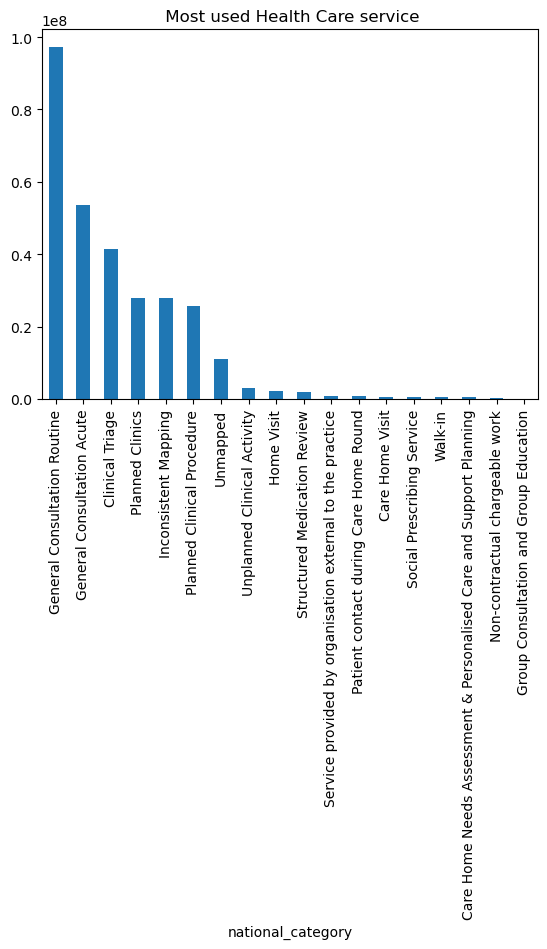

In [28]:
# Back up
nc_c = nc.copy()

# National_category: most used health care service used by patients (volume/sum)
print(f'National_category: most used health care service used by patients: ')

# Bar graph
nc_c.groupby('national_category')['count_of_appointments'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title(" Most used Health Care service")


Insight: 
- General Consulation Routine and General Consulatition Acure most common service used

service_setting
General Practice             270811691
Unmapped                      11080810
Primary Care Network           6557386
Other                          5420076
Extended Access Provision      2176807
Name: count_of_appointments, dtype: int64

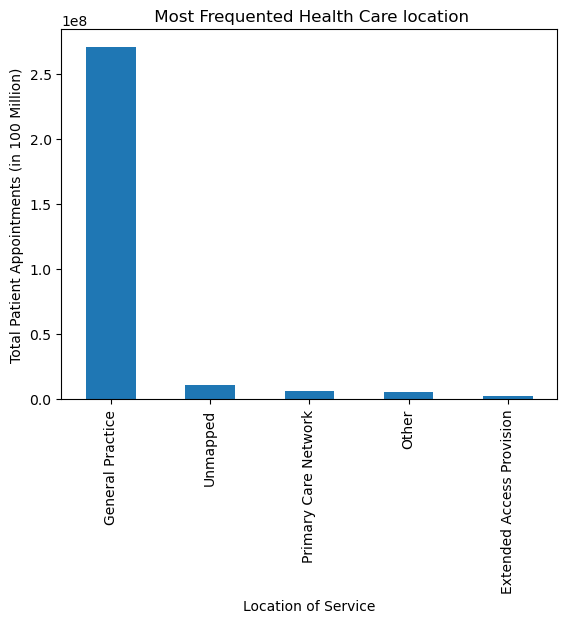

In [46]:
# Plot bar graph - service setting
nc_c.groupby("service_setting")["count_of_appointments"].sum().sort_values(
    ascending=False
).plot(kind="bar")

# Plot labels
plt.xlabel("Location of Service")
plt.ylabel("Total Patient Appointments (in 100 Million)")
plt.title(" Most Frequented Health Care location")

# Show
display(
    nc_c.groupby("service_setting")["count_of_appointments"]
    .sum()
    .sort_values(ascending=False)
)

Insight: 
- Most popular location for patients to received consulation is at GP

In [47]:
# Utilization of resource: Pivot table combination of two categorical variable
display(
    nc_c.pivot_table(
        index="national_category",
        columns="service_setting",
        values="count_of_appointments",
        aggfunc="sum",
    ).sort_values("General Practice", ascending=False)
)

service_setting,Extended Access Provision,General Practice,Other,Primary Care Network,Unmapped
national_category,,,,,
General Consultation Routine,399182.0,93358462.0,1377569.0,2136309.0,NaN
General Consultation Acute,413066.0,52059940.0,606115.0,612029.0,NaN
Clinical Triage,382876.0,40246576.0,575083.0,342429.0,NaN
Planned Clinics,261418.0,26376358.0,515480.0,866492.0,NaN
Inconsistent Mapping,438355.0,24997475.0,1642532.0,812440.0,NaN
Planned Clinical Procedure,173016.0,24986338.0,302533.0,240807.0,NaN
Unplanned Clinical Activity,37358.0,2872873.0,51300.0,94263.0,NaN
Home Visit,5071.0,2040497.0,30832.0,68052.0,NaN
Structured Medication Review,5816.0,1312506.0,32417.0,507640.0,NaN


Insights: 
- Most used service is General Consultatuion routine
- Most frequented location is the General Practice

### 3.2. Map out health Network

#### 3.2.1 Landscape of health care - ad

In [48]:
# Backing up ad to map network of NHS
ad_c = ad.copy()

# Network structure variable
# Create variable containing list for subset
network_ad = [ad_c.columns[4], ad_c.columns[3], ad_c.columns[1], ad_c.columns[-1]]

# Create subset of data set
network_structure = ad_c[network_ad]

In [60]:
# Verification that count is correct
# Total regions
print(f"Total number of Regions: {network_structure["region_ons_code"].nunique()}")

# Total icb
print(
    f"Total number of icbs: {network_structure.groupby("region_ons_code")["icb_ons_code"].nunique().sum()}"
)

# Total sub-icbs
print(
    f"Total number of sub_icb: {network_structure.groupby("region_ons_code")[network_structure.columns[2]].nunique().sum()}"
)

# Conditional statement to verify code done right
print(
    f"Conditional statement return boolean value same total number of unique sub_icb: {network_structure.groupby("region_ons_code")[network_structure.columns[2]].nunique().sum()== network_structure["sub_icb_location_ons_code"].nunique()}"
)

Total number of Regions: 7
Total number of icbs: 42
Total number of sub_icb: 106
Conditional statement return boolean value same total number of unique sub_icb: True


Insights:
1) Macro scale is  Regions 7 >  Meso scale is ICB 42 > Micro scale is sub_icb 106
Commentary: 
1) Wondering if all regions have the same number of ICBs and Sub ICB

In [68]:
# How many per region
print(f"How many icb are within each region?")

# Assign variable
count_icb_region = network_structure.groupby(by="region_ons_code", sort=False)[
    ["icb_ons_code"]
].nunique()

# See descending value
display(count_icb_region.sort_values(by="icb_ons_code", ascending=False))

How many icb are within each region?


,icb_ons_code
region_ons_code,
E40000011,11
E40000006,7
E40000007,6
E40000005,6
E40000003,5
E40000012,4
E40000010,3


Insight: E40000011 largest region

In [74]:
# Overall patients per region - What is the total number of patients per region?
print(
    f"Which is the most frequent region that appears (how often/how likely to encounter?:{network_structure[['region_ons_code']].value_counts()}"
)

# Create variable for tabular form summary as SERIES - regional_structure
number_patients_region = network_structure.value_counts(
    subset="region_ons_code"
).sort_index(
    ascending=False
)  # index start with 012

# Convert series into df
number_patients_region = pd.DataFrame(number_patients_region)

# Context of what number actually mean
print(
    f"The number above are a portion out of a total of {network_structure.shape[0]:,}"
)

# Convert dtype
number_patients_region.convert_dtypes()

Which is the most frequent region that appears (how often/how likely to encounter?:region_ons_code
E40000010          33112
E40000012          29063
E40000011          25015
E40000007          18888
E40000005          15130
E40000006           9465
E40000003           7120
Name: count, dtype: int64
The number above are a portion out of a total of 137,793


,count
region_ons_code,
E40000012,29063
E40000011,25015
E40000010,33112
E40000007,18888
E40000006,9465
E40000005,15130
E40000003,7120


Insight: 
- E4000010 is the appears the most often in the actual_duration data set

In [75]:
# How many sub_icb are within each region?
print(f"How many sub_icb are within each region?")

# Assign variable mask
count_sub_region = network_structure.groupby(by="region_ons_code", sort=False)[
    ["sub_icb_location_ons_code"]
].nunique()

# View
display(count_sub_region.sort_values(by="sub_icb_location_ons_code", ascending=False))

How many sub_icb are within each region?


,sub_icb_location_ons_code
region_ons_code,
E40000010,27
E40000012,23
E40000011,19
E40000007,14
E40000005,11
E40000006,7
E40000003,5


-Insights: 
- E4000010 is the appears the most often in the actual_duration data set
- The region with largest number of icb is E4000011 containing 11 ICBs.
- Unexpected since the E4000011 is 3rd and E4000010 contains the lowest ICBs and the largest occurance.
- Followed by E4000012 2nd lowest and 2nd largest occurance in the data set.

In [77]:
# Total per region
total_patients_region = network_structure.groupby(by="region_ons_code", sort=False)[
    ["count_of_appointments"]
].sum()

# Check and sort by most total
display(total_patients_region.sort_values(by="count_of_appointments", ascending=False))

,count_of_appointments
region_ons_code,
E40000011,32574555
E40000012,27425610
E40000005,25577953
E40000003,24488519
E40000010,19880924
E40000007,19546694
E40000006,18486437


In [78]:
# Variable creation
total_patients_region = pd.DataFrame(total_patients_region)
display(total_patients_region)

count_sub_region = pd.DataFrame(count_sub_region)
display(count_sub_region)

count_icb_region = pd.DataFrame(count_icb_region)
display(count_icb_region)

number_patients_region = pd.DataFrame(number_patients_region)

,count_of_appointments
region_ons_code,
E40000012,27425610
E40000010,19880924
E40000011,32574555
E40000007,19546694
E40000005,25577953
E40000006,18486437
E40000003,24488519


,sub_icb_location_ons_code
region_ons_code,
E40000012,23
E40000010,27
E40000011,19
E40000007,14
E40000005,11
E40000006,7
E40000003,5


,icb_ons_code
region_ons_code,
E40000012,4
E40000010,3
E40000011,11
E40000007,6
E40000005,6
E40000006,7
E40000003,5


In [79]:
# Summary table: network structure
table = pd.merge(count_icb_region, count_sub_region, left_index=True, right_index=True)
table = pd.merge(table, number_patients_region, left_index=True, right_index=True)
table = pd.merge(table, total_patients_region, left_index=True, right_index=True)
table = table.rename(
    columns={
        "icb_ons_code": "number_of_icb",
        "sub_icb_location_ons_code": "number_of_sub",
        "count": "number_of_patients",
        "count_of_appointments": "total_patients",
    }
)
table.sort_values(by="total_patients", ascending=False)

,number_of_icb,number_of_sub,number_of_patients,total_patients
region_ons_code,,,,
E40000011,11,19,25015,32574555
E40000012,4,23,29063,27425610
E40000005,6,11,15130,25577953
E40000003,5,5,7120,24488519
E40000010,3,27,33112,19880924
E40000007,6,14,18888,19546694
E40000006,7,7,9465,18486437


Insights:
- number of patients represents count in other words observation and in nc that number can represent 1 to 50 at any given point, so it is incorrect title
- As shown above the it is not always true, since E10 contains less total_patients than E12 even though E10 count is greater than E12 


<Axes: xlabel='region_ons_code'>

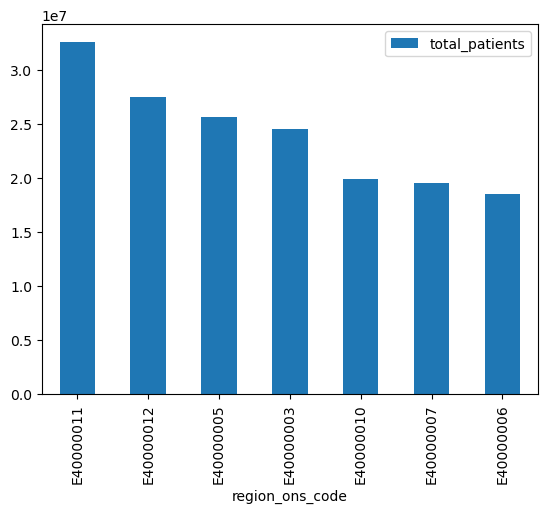

In [95]:
# Assign variable and reset index
table2 = table.reset_index()
# table2.plot(kind='bar', x='region_ons_code')

# Plot barchart descending region by largest number of appointments
table2.sort_values(by="total_patients", ascending=False).plot(
    kind="bar", y="total_patients", x="region_ons_code"
)

,number_of_sub,number_of_patients
number_of_sub,1.000000,0.998286
number_of_patients,0.998286,1.000000


High positive correlation between number of sub and number of patients - means the more sub locations you have the greater the number of patients you can see


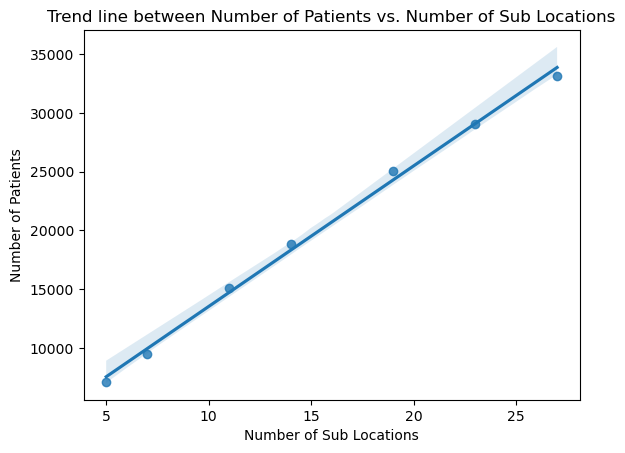

In [94]:
# Visualization: regline
ax = sns.regplot(data=table, x="number_of_sub", y="number_of_patients")

# Labels
ax.set_ylabel("Number of Patients")
ax.set_xlabel("Number of Sub Locations")
ax.set_title("Trend line between Number of Patients vs. Number of Sub Locations")

# View correlation table
display(table[["number_of_sub", "number_of_patients"]].corr(method="pearson"))

# Context
print(
    f"High positive correlation between number of sub and number of patients - means the more sub locations you have the greater the number of patients you can see"
)

Insight: 
- high positive correlation between number of sub and number of patients, means the more sub locations you have the greater the number of patients you can see

### 3.3 Determine Adequacy - Ar
Determine if trend is positive or negative in appointments
    - insights:
        - positive trend means increase in average and total number of appointments
        
Determined by average used as reference line - apply metric
    - insights:
        - average of ar is used as metric & reference line to determine adequate
        - clear from trendline projection its slowly increasing 

Conclusion: Need more staff and resources since the capacity in the last 11 months is flunctuating at consolidation point as shown by linegraph         

In [87]:
# NC appointment month
display(nc_c["appointment_month"].unique())
display(nc_c["appointment_month"].nunique())

# AR appointment month
display(ar_c["appointment_month"].unique())
display(ar_c["appointment_month"].nunique())

<StringArray>
['2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02',
 '2022-03', '2022-04', '2022-05', '2022-06']
Length: 11, dtype: string

11

<StringArray>
['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
 '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
 '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
 '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04',
 '2022-05', '2022-06']
Length: 30, dtype: string

30

#### Trend visualization: Time series

In [88]:
# Create back up of ar
ar_c = ar.copy()

#### Average Monthly Appointments (metric to determine adequate capacity)

Text(0.5, 1.0, 'Average Number of Patients per Month')

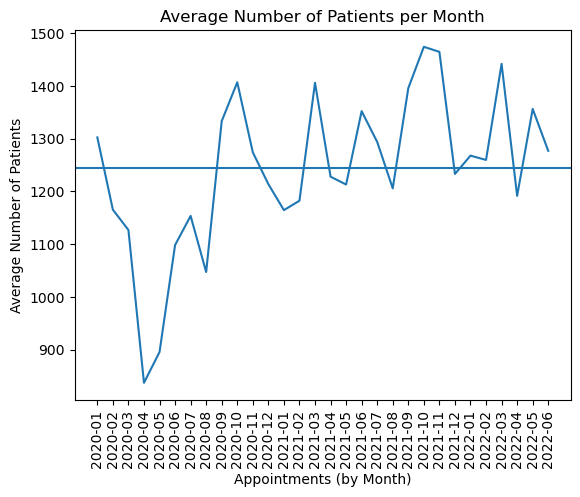

In [90]:
# Average patient appointments per month
# Data in pivot table
overall_patients_trend_avg = pd.pivot_table(
    data=ar_c, index="appointment_month", values="count_of_appointments", aggfunc="mean"
).reset_index()

# Plot
ax = sns.lineplot(
    data=overall_patients_trend_avg, x="appointment_month", y="count_of_appointments"
)
ax.tick_params(axis="x", rotation=90)
ax.axhline(ar_c["count_of_appointments"].mean())

# Labels
ax.set_ylabel("Average Number of Patients")
ax.set_xlabel("Appointments (by Month)")
ax.set_title("Average Number of Patients per Month")

Insights:
- Average of ar is used as metric & reference line to determine adequate
- Clear from trendline projection its slowly increasing 

Conclusion: 
- Need more staff and resources since the capacity in the last 6 months is flunctuating at consolidation point as shown by linegraph        

In [64]:
display(overall_patients_trend_avg[overall_patients_trend_avg['count_of_appointments'] > ar_c['count_of_appointments'].mean()].shape)
display(overall_patients_trend_avg.shape)

(15, 2)

(30, 2)

Insights:
- Indicates macro trend is increasing
- Average number of appointment indicates split in between
- However increase in population is expected therefore reasonable to indicate current structure is at max capacity

#### Total number of patients per month (sum line graph)

Text(0.5, 1.0, 'Total Patients: Trend')

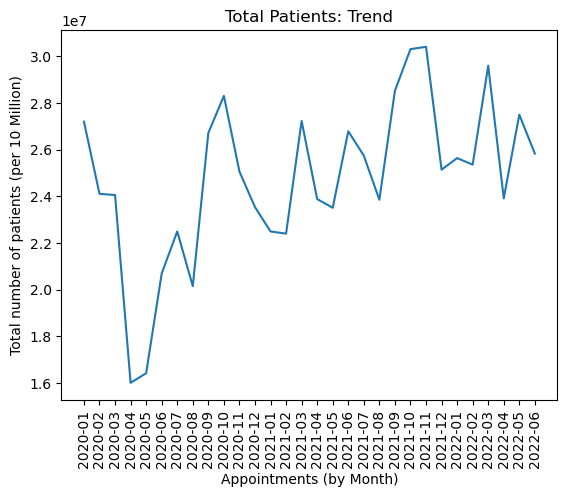

In [91]:
# ar_lineplot_patients = ar_c.groupby('appointment_month')[['count_of_appointments']].sum().reset_index()
ar_lineplot_patients = ar_c.groupby("appointment_month")[
    ["count_of_appointments"]
].sum()

# Plot line plot -
ax = sns.lineplot(
    data=ar_lineplot_patients,
    x="appointment_month",
    y="count_of_appointments",
    legend="brief",
)
ax.tick_params(axis="x", rotation=90)
ax.set_ylabel("Total number of patients (per 10 Million)")
ax.set_xlabel("Appointments (by Month)")
ax.set_title("Total Patients: Trend")

#### Staff workload

Text(0.5, 0, 'Appointments (by Months)')

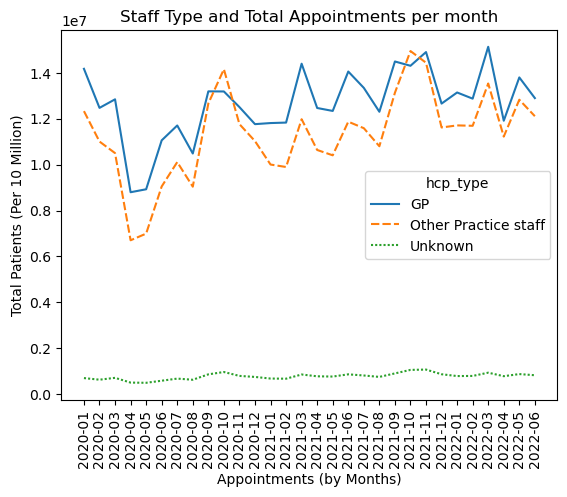

In [92]:
# Staff workload - monthly sum of patients
ar_lineplot_staff = (
    ar_c.groupby(["appointment_month", "hcp_type"])["count_of_appointments"]
    .sum()
    .reset_index(level=1)
)

# Create pivot table and assign variable
ar_piv_staff = pd.pivot_table(
    ar_c,
    columns="hcp_type",
    index="appointment_month",
    values="count_of_appointments",
    aggfunc="sum",
)

# Plot lineplot
ax = sns.lineplot(data=ar_piv_staff, legend="brief")

# Rotate x tick 
ax.tick_params(axis="x", rotation=90)

# Labels
ax.set_title("Staff Type and Total Appointments per month")
ax.set_ylabel("Total Patients (Per 10 Million)")
ax.set_xlabel("Appointments (by Months)")

Insight:
- staff following same trend as Average patient appointments per month line graph